# 0.0 - Import Requirements

## 0.1 - Import Libraries

In [50]:
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from kaggle.api.kaggle_api_extended import KaggleApi

## 0.2 - Import Dataset

In [51]:
# Try another customer dataset

api = KaggleApi()
api.authenticate()

# Define dataset path
project_root = r'C:\Users\I43282N\GitHub\customer_segmentation'
data_path = os.path.join(project_root, 'dataset')

api.dataset_download_files('vjchoudhary7/customer-segmentation-tutorial-in-python', path=data_path, unzip=True)
print(f"✓ Alternative dataset downloaded to: {data_path}")

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
✓ Alternative dataset downloaded to: C:\Users\I43282N\GitHub\customer_segmentation\dataset
✓ Alternative dataset downloaded to: C:\Users\I43282N\GitHub\customer_segmentation\dataset


In [52]:
df = pd.read_csv(os.path.join(data_path, 'Mall_Customers.csv'))

In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 1.0 - Selecting Columns for Clustering

In [54]:
cluster_column = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [55]:
cluster_column

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [56]:
scaler = StandardScaler()
cluster_column_scaled = scaler.fit_transform(cluster_column)

# 2.0 - Exploratory Data Analysis (EDA)

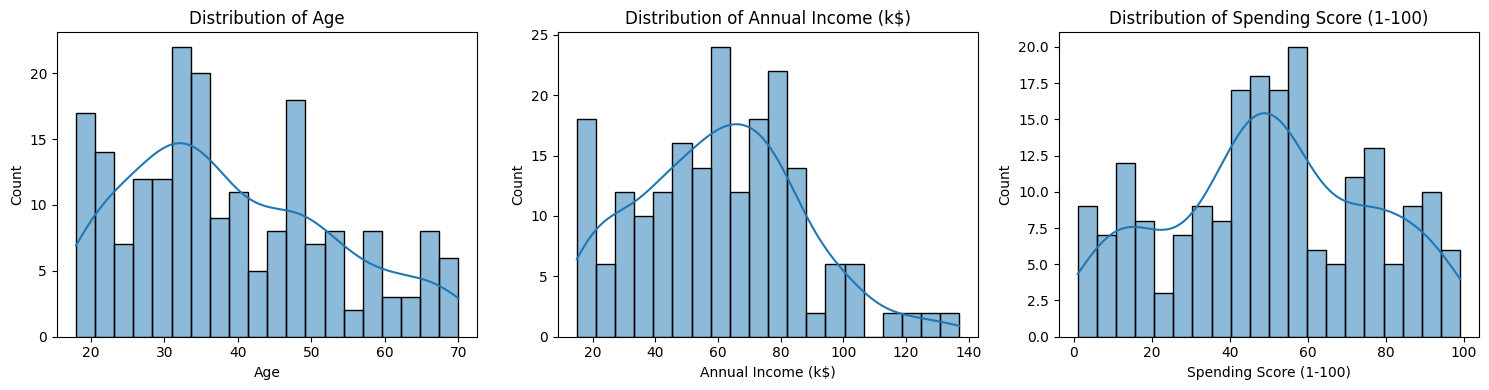

In [57]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3.0 - Scatter Plot Between Income and Spending

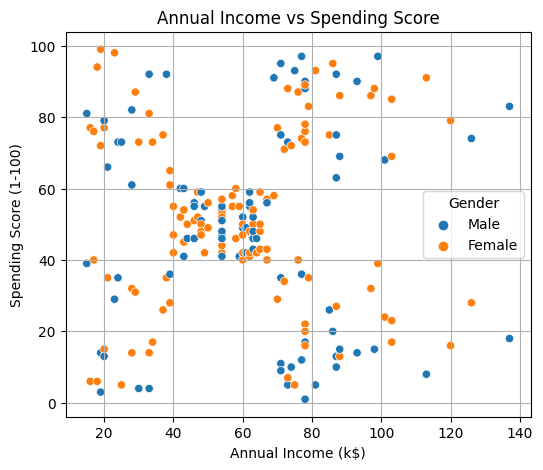

In [58]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# 4.0 - Applying K-Means Clustering

In [59]:
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(cluster_column_scaled)

df['Cluster'] = clusters

## 4.1 - Customer Clusters (k=5)

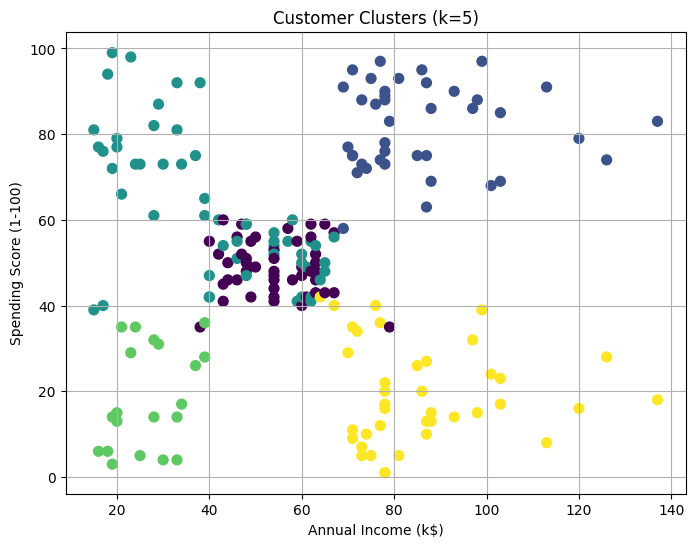

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (k=5)')
plt.grid(True)
plt.show()

## 4.2 - Determining the Optimal Number of Clusters

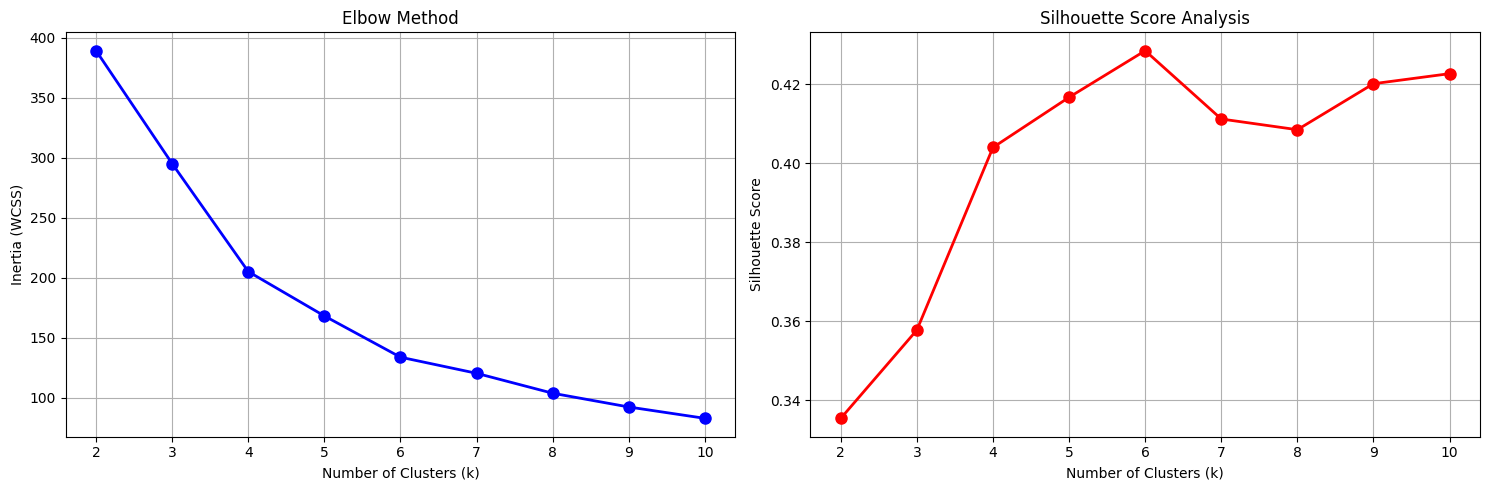

Inertia Values: [389.3861889564371, 295.2122461555489, 205.22514747675916, 168.24758017556837, 133.86842085478855, 120.43283250037277, 103.81525583671635, 92.34945767113052, 82.88526644450906]
k	Inertia	Silhouette Score
2	389.39	0.34
3	295.21	0.36
4	205.23	0.40
5	168.25	0.42
6	133.87	0.43
7	120.43	0.41
8	103.82	0.41
9	92.35	0.42
10	82.89	0.42


In [61]:
# Test different numbers of clusters
k_range = range(2,11)
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_column_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_column_scaled, kmeans.labels_))
    
# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Plot
ax1.plot(k_range, inertia_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Silhouette Score Plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Analysis')
ax2.grid(True)  

plt.tight_layout()
plt.show()

# Show the Values
print("Inertia Values:", inertia_values)
print("k\tInertia\tSilhouette Score")
for k, inertia, silhouette in zip(k_range, inertia_values, silhouette_scores):
    print(f"{k}\t{inertia:.2f}\t{silhouette:.2f}")

# 4.3 - Finding the Best K

In [62]:
best_k = k_range[np.argmax(silhouette)]
best_silhouette = max(silhouette_scores)

print(f"\nOptimal number of clusters (k): {best_k}")
print(f"\nBest silhouette score: {best_silhouette:.3f}")

# Apply K-Means with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_clusters = kmeans.fit_predict(cluster_column_scaled)

# Add clusters to DataFrame
df['Final Cluster'] = final_clusters

print(f'\nClustering applied with k={best_k} clusters!')
print(f'\nCluster distribution:')
print(df['Cluster'].value_counts().sort_index())


Optimal number of clusters (k): 2

Best silhouette score: 0.428

Clustering applied with k=2 clusters!

Cluster distribution:
0    47
1    40
2    54
3    20
4    39
Name: Cluster, dtype: int64


In [63]:
# Fix the silhouette_scores variable
best_k = k_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"Optimal number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_silhouette:.3f}")

# Apply K-Means with the best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_clusters = kmeans_final.fit_predict(cluster_column_scaled)

# Add clusters to DataFrame
df['Final_Cluster'] = final_clusters

print(f"\nClustering applied with k={best_k} clusters!")
print(f"\nCluster distribution:")
print(df['Final Cluster'].value_counts().sort_index())

Optimal number of clusters (k): 6
Best silhouette score: 0.428

Clustering applied with k=6 clusters!

Cluster distribution:
0    103
1     97
Name: Final Cluster, dtype: int64


# 5.0 - Visualizing Final Clusters

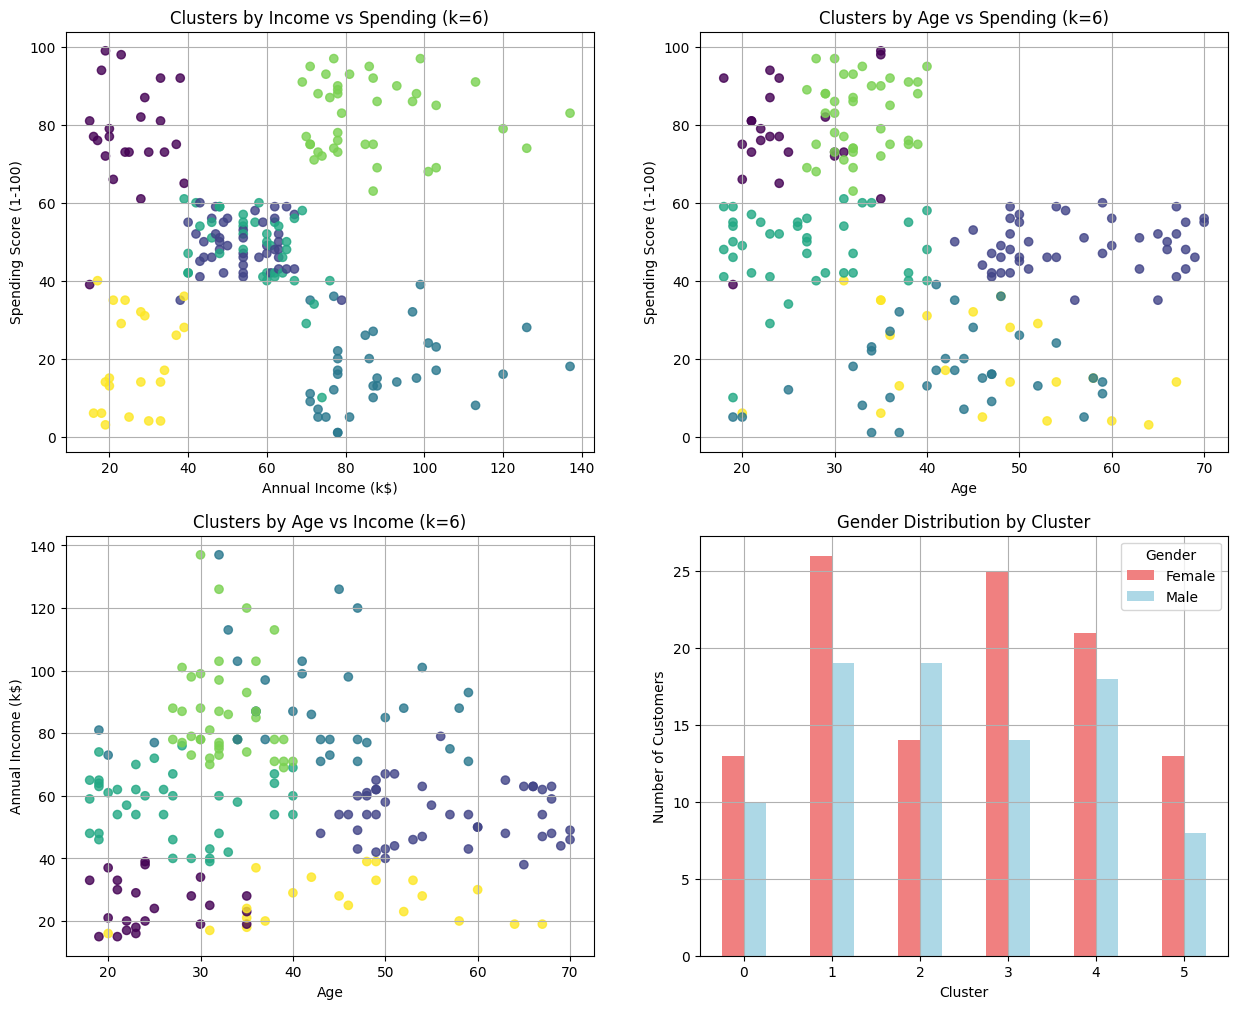

In [64]:
# Visualize final clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graph 1: Income vs Spending Score
axes[0,0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Final_Cluster'], cmap='viridis', alpha=0.8)
axes[0,0].set_xlabel('Annual Income (k$)')
axes[0,0].set_ylabel('Spending Score (1-100)')
axes[0,0].set_title(f'Clusters by Income vs Spending (k={best_k})')
axes[0,0].grid(True)

# Graph 2: Age vs Spending Score
axes[0,1].scatter(df['Age'], df['Spending Score (1-100)'], c=df['Final_Cluster'], cmap='viridis', alpha=0.8)
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Spending Score (1-100)')
axes[0,1].set_title(f'Clusters by Age vs Spending (k={best_k})')
axes[0,1].grid(True)

# Graph 3: Income vs Age
axes[1,0].scatter(df['Age'], df['Annual Income (k$)'], c=df['Final_Cluster'], cmap='viridis', alpha=0.8)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Annual Income (k$)')
axes[1,0].set_title(f'Clusters by Age vs Income (k={best_k})')
axes[1,0].grid(True)

# Graph 4: Gender Distribution
cluster_gender = df.groupby(['Final_Cluster', 'Gender']).size().unstack(fill_value=0)
cluster_gender.plot(kind='bar', ax=axes[1,1], color=['lightcoral', 'lightblue'])
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_title('Gender Distribution by Cluster')
axes[1,1].legend(title='Gender')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].grid(True)

# 6.0 - Cluster Analysis

In [65]:
# Statistical analysis of clusters
print('Detailed cluster analysis:')
print('='*50)

for cluster in sorted(df['Final_Cluster'].unique()):
    cluster_data = df[df['Final_Cluster'] == cluster]
    print(f"\n🎯 CLUSTER {cluster} (n={len(cluster_data)})")
    print(f"   Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"   Income: {cluster_data['Annual Income (k$)'].mean():.1f}k$ ± {cluster_data['Annual Income (k$)'].std():.1f}")
    print(f"   Spending: {cluster_data['Spending Score (1-100)'].mean():.1f} ± {cluster_data['Spending Score (1-100)'].std():.1f}")
    print(f"   Gender: {cluster_data['Gender'].value_counts().to_dict()}")

Detailed cluster analysis:

🎯 CLUSTER 0 (n=23)
   Age: 25.0 ± 5.3
   Income: 25.3k$ ± 7.7
   Spending: 77.6 ± 13.3
   Gender: {'Female': 13, 'Male': 10}

🎯 CLUSTER 1 (n=45)
   Age: 56.3 ± 8.5
   Income: 54.3k$ ± 9.0
   Spending: 49.1 ± 6.3
   Gender: {'Female': 26, 'Male': 19}

🎯 CLUSTER 2 (n=33)
   Age: 41.9 ± 10.2
   Income: 88.9k$ ± 16.6
   Spending: 17.0 ± 10.0
   Gender: {'Male': 19, 'Female': 14}

🎯 CLUSTER 3 (n=39)
   Age: 26.8 ± 7.1
   Income: 57.1k$ ± 10.2
   Spending: 48.1 ± 10.0
   Gender: {'Female': 25, 'Male': 14}

🎯 CLUSTER 4 (n=39)
   Age: 32.7 ± 3.7
   Income: 86.5k$ ± 16.3
   Spending: 82.1 ± 9.4
   Gender: {'Female': 21, 'Male': 18}

🎯 CLUSTER 5 (n=21)
   Age: 45.5 ± 11.8
   Income: 26.3k$ ± 7.4
   Spending: 19.4 ± 12.6
   Gender: {'Female': 13, 'Male': 8}


# 7.0 - Cluster Interpretation

In [66]:
# Add cluster interpretation
def interpret_clusters(cluster):
    """Create business interpretation for each cluster"""
    cluster_profiles = {}
    
    for cluster in sorted(df['Final_Cluster'].unique()):
        cluster_data = df[df['Final_Cluster'] == cluster]
        
        # Calculate metrics
        avg_age = cluster_data['Age'].mean()
        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        
        # Create business profile
        if avg_income > 70 and avg_spending > 70:
            profile = "💎 Premium Customers (High Income + High Spending)"
        elif avg_income > 70 and avg_spending < 40:
            profile = "💰 Conservative Customers (High Income + Low Spending)"
        elif avg_income < 40 and avg_spending > 70:
            profile = "🎯 Impulsive Customers (Low Income + High Spending)"
        elif avg_income < 40 and avg_spending < 40:
            profile = "📊 Budget Customers (Low Income + Low Spending)"
        else:
            profile = "⚖️ Moderate Customers (Balanced Profile)"
            
        cluster_profiles[cluster] = profile
    
    return cluster_profiles

# Use the function
profiles = interpret_clusters(df)
for cluster, profile in profiles.items():
    print(f"Cluster {cluster}: {profile}")

Cluster 0: 🎯 Impulsive Customers (Low Income + High Spending)
Cluster 1: ⚖️ Moderate Customers (Balanced Profile)
Cluster 2: 💰 Conservative Customers (High Income + Low Spending)
Cluster 3: ⚖️ Moderate Customers (Balanced Profile)
Cluster 4: 💎 Premium Customers (High Income + High Spending)
Cluster 5: 📊 Budget Customers (Low Income + Low Spending)


## 7.1 - Validation with Other Algorithms

In [67]:
# Compare with other clustering algorithms
def compare_algorithms(data):
    """Compare different clustering algorithms"""
    algorithms = {
        'KMeans': KMeans(n_clusters=best_k, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=best_k),
        'GaussianMixture': GaussianMixture(n_components=best_k, random_state=42)
    }
    
    results = {}
    for name, algo in algorithms.items():
            labels = algo.fit_predict(data)
            if len(set(labels)) > 1: # Avoid unique clusters
                silhouette = silhouette_score(data, labels)
                results[name] = silhouette
                
    return results

# Compare algorithms
comparison = compare_algorithms(cluster_column_scaled)
print("\nComparison of Clustering Algorithms:")
for algo, score in comparison.items():
    print(f"{algo}: Silhouette Score = {score:.3f}")


Comparison of Clustering Algorithms:
KMeans: Silhouette Score = 0.428
Agglomerative: Silhouette Score = 0.420
GaussianMixture: Silhouette Score = 0.373


## 7.2 - Stability Analysis

In [68]:
# Test cluster stability
def stability_analysis(data, n_iterations=10):
    """Analyze cluster stability"""
    stability_scores = []
    
    for i in range(n_iterations):
        kmeans = KMeans(n_clusters=best_k, random_state=i)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        stability_scores.append(score)
    
    return stability_scores

# Execute analysis
stability = stability_analysis(cluster_column_scaled)
print(f"Cluster Stability:")
print(f"Mean: {np.mean(stability):.3f}")
print(f"Standard Deviation: {np.std(stability):.3f}")

Cluster Stability:
Mean: 0.427
Standard Deviation: 0.001


## 7.3 - Marketing Recommendations

In [69]:
# Generate automatic recommendations
def generate_recommendations(df):
    """Generate marketing recommendations by cluster"""
    recommendations = {}
    
    for cluster in sorted(df['Final_Cluster'].unique()):
        cluster_data = df[df['Final_Cluster'] == cluster]
        
        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        
        if avg_income > 70 and avg_spending > 70:
            rec = "🎯 Focus on premium products and exclusive experiences"
        elif avg_income > 70 and avg_spending < 40:
            rec = "💡 Value offers and strategic discount products"
        elif avg_income < 40 and avg_spending > 70:
            rec = "⚡ Affordable products with strong emotional appeal"
        else:
            rec = "📈 Engagement and loyalty campaigns"
            
        recommendations[cluster] = rec
    
    return recommendations

# Generate recommendations
recs = generate_recommendations(df)
for cluster, rec in recs.items():
    print(f"Cluster {cluster}: {rec}")

Cluster 0: ⚡ Affordable products with strong emotional appeal
Cluster 1: 📈 Engagement and loyalty campaigns
Cluster 2: 💡 Value offers and strategic discount products
Cluster 3: 📈 Engagement and loyalty campaigns
Cluster 4: 🎯 Focus on premium products and exclusive experiences
Cluster 5: 📈 Engagement and loyalty campaigns


## 7.4 - Executive Summary

In [70]:
# Generate executive summary
def executive_summary(df):
    """Create executive summary"""
    total_customers = len(df)
    n_clusters = df['Final_Cluster'].nunique()
    
    print("=" * 60)
    print("📊 EXECUTIVE SUMMARY - CUSTOMER SEGMENTATION")
    print("=" * 60)
    print(f"Total Customers Analyzed: {total_customers}")
    print(f"Number of Segments Identified: {n_clusters}")
    print(f"Best Silhouette Score: {best_silhouette:.3f}")
    print("\n🎯 IDENTIFIED SEGMENTS:")
    
    for cluster in sorted(df['Final_Cluster'].unique()):
        cluster_data = df[df['Final_Cluster'] == cluster]
        size = len(cluster_data)
        percentage = (size / total_customers) * 100
        print(f"   Segment {cluster}: {size} customers ({percentage:.1f}%)")

# Execute report
executive_summary(df)

📊 EXECUTIVE SUMMARY - CUSTOMER SEGMENTATION
Total Customers Analyzed: 200
Number of Segments Identified: 6
Best Silhouette Score: 0.428

🎯 IDENTIFIED SEGMENTS:
   Segment 0: 23 customers (11.5%)
   Segment 1: 45 customers (22.5%)
   Segment 2: 33 customers (16.5%)
   Segment 3: 39 customers (19.5%)
   Segment 4: 39 customers (19.5%)
   Segment 5: 21 customers (10.5%)
